Tensorflow version 1.8.0


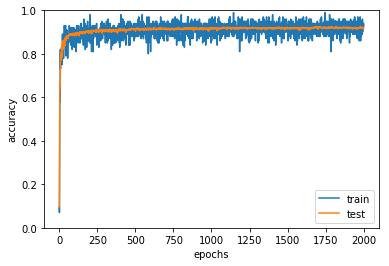

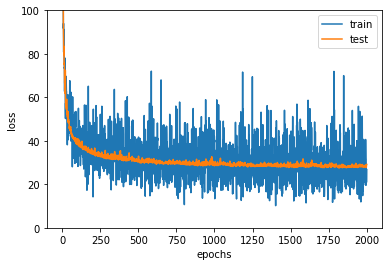

In [6]:
# encoding: UTF-8
# original source : https://github.com/GoogleCloudPlatform/tensorflow-without-a-phd/tree/master/tensorflow-mnist-tutorial
# 2018.12 : modified by Seungkwon Lee(kahnlee@naver.com)

import tensorflow as tf
import mnistdata
import math
print("Tensorflow version " + tf.__version__)
import matplotlib.pyplot as plt
import numpy as np

tf.set_random_seed(0)

# neural network with 1 layer of 10 softmax neurons
#
# · · · · · · · · · ·       (input data, flattened pixels)       X [batch, 784]        # 784 = 28 * 28
# \x/x\x/x\x/x\x/x\x/    -- fully connected layer (softmax)      W [784, 10]     b[10]
#   · · · · · · · ·                                              Y [batch, 10]

# The model is:
#
# Y = softmax( X * W + b)
#              X: matrix for 100 grayscale images of 28x28 pixels, flattened (there are 100 images in a mini-batch)
#              W: weight matrix with 784 lines and 10 columns
#              b: bias vector with 10 dimensions
#              +: add with broadcasting: adds the vector to each line of the matrix (numpy)
#              softmax(matrix) applies softmax on each line
#              softmax(line) applies an exp to each value then divides by the norm of the resulting line
#              Y: output matrix with 100 lines and 10 columns

# Download images and labels into mnist.test (10K images+labels) and mnist.train (60K images+labels)
mnist = mnistdata.read_data_sets("data", one_hot=True, reshape=False)

# input X: 28x28 grayscale images, the first dimension (None) will index the images in the mini-batch
X = tf.placeholder(tf.float32, [None, 28, 28, 1])
# correct answers will go here
Y_ = tf.placeholder(tf.float32, [None, 10])
# weights W[784, 10]   784=28*28
W = tf.Variable(tf.zeros([784, 10]))
# biases b[10]
b = tf.Variable(tf.zeros([10]))

# flatten the images into a single line of pixels
# -1 in the shape definition means "the only possible dimension that will preserve the number of elements"
XX = tf.reshape(X, [-1, 784])

# The model
Y = tf.nn.softmax(tf.matmul(XX, W) + b)

# loss function: MSE
# loss = tf.reduce_mean(tf.squared_difference(Y, Y_)) * 1000

# loss function: CEE
loss = -tf.reduce_mean(Y_*tf.log(Y)) * 1000

# accuracy of the trained model, between 0 (worst) and 1 (best)
correct_prediction = tf.equal(tf.argmax(Y, 1), tf.argmax(Y_, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

# training, learning rate = 0.005
train_step = tf.train.GradientDescentOptimizer(0.005).minimize(loss)

# save model
saver = tf.train.Saver(max_to_keep=4)

# init
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)
#     saver.save(sess, '../model/mnist_model')

train_acc_list = []
test_acc_list = []
train_loss_list = []
test_loss_list = []

# run
for i in range(2000 + 1) : #2000

    batch_X, batch_Y = mnist.train.next_batch(100)
    a, c = sess.run([accuracy, loss], feed_dict={X : batch_X, Y_ : batch_Y})
    # print("training : ", i, a,c)
#     print("training : ", i, ' accuracy = ', '{:7.4f}'.format(a), ' loss = ', c)
    train_acc_list.append(a)
    train_loss_list.append(c)

    # test_batch_X, test_batch_Y = mnist.test.next_batch(100)  ==> never use mini batch!!
    # sess.run(train_step, feed_dict={X: test_batch_X, Y_: test_batch_Y})  ==> never run train_step on test data!!
    a, c = sess.run([accuracy, loss], feed_dict={X: mnist.test.images, Y_: mnist.test.labels})
    # print("testing  : ",i, a, c)
#     print("testing  : ",i, ' accuracy = ', '{:7.4f}'.format(a), ' loss = ', c)
    test_acc_list.append(a)
    test_loss_list.append(c)

    sess.run(train_step, feed_dict={X : batch_X, Y_ : batch_Y} )
    if(i % 500 == 0 and i != 0 ):
        saver.save(sess, '../model/mnist_CEE_model', global_step=i)


# draw graph : accuracy
x = np.arange(len(train_acc_list))
plt.figure(1) 
plt.plot(x, train_acc_list,  label='train', markevery=1)
plt.plot(x, test_acc_list, label='test', markevery=1)
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
# plt.show()

# draw graph : loss
x = np.arange(len(train_loss_list))
plt.figure(2) 
plt.plot(x, train_loss_list,  label='train', markevery=1)
plt.plot(x, test_loss_list, label='test', markevery=1)
plt.xlabel("epochs")
plt.ylabel("loss")
plt.ylim(0, 100)
plt.legend(loc='upper right')
plt.show()